# 선형 판별분석과 이차 판별분석 (분류모델)

## 13.4 선형 판별부석과 이차 판별분석 (분류모델)

 판별분석은 로지스틱 회귀분석처럼 질적 척도로 이루어진 종속변수를 분류할 때 쓰이는 분석 기법이다. 회귀분석처럼 최소 제곱법을 사용하는 추정방법을 통해 독립변수의 최적 가중치를 구한다. 성능 면에서 로지스틱 회귀분석보다 우수하며, 독립변수들이 정규분포를 따르지 않더라도 활용가능하다.

  종속변수의 범주가 2개일 때는, 일반 판별분석 or 두집단 판별분석이라 부르고, 세 개 이상인 경우에는 다중 판별분석이라 한다.

  범주를 구분하는 결정경계선을 산출하는 방식에 따라 선형 판별 분석과 이차 판별분석으로 구분된다. 

### 13.4.1 선형판별분석

 선형 판별분석은 PCA와 같은 차원축소에도 사용된다. PCA는 비지도, 선형판별분석은 지도학습임. 

 선형 판별분석 전체 범주의 분류 오차를 최소화하는 선형 판별함수를 도찰한 다음 모든 관측치의 분류점수를 도출한다. 분류점수를 통해 해당 관측치가 어느 범주에 속할 것인지 예측할 수 있다. 

 선형 판별 함수는 집단내 분산에 비해 집단 간 분산의 차이를 최대화하는 독립변수의 함수를 찾는 것이다 .

 각 범주에 대한 선형 판별함수 도출 -> 관측치에 대하여 각 범주별 분류점수를 계산하고 가장 큰 분류 점수를 갖는 범주로 관측치를 분류해준다. 
 ![Alt text](image-13.png)

 
 #### 선형 판별 분석의 조건 

 1. 데이터가 정규 분포한다.
 2. 각각의 범주들은 공일한 공분산 행렬을 갖는다.
 3. 독립변수들은 통계적으로 상호 독립적이다. 

 - 데이터 전처리를 통해 최대한 조건을 맞춰주고, 독립변수들 간 독립성이 충족되지 않는다면 이차 판별분석을 사용한다 . 
<!-- 
선형 판별분석의 조건이 
1. 데이터가 정규분포 해야한다. 
2. 독립변수들은 상호 독립적이어야한다.
3. 각각의 범주들은 동일한 공분산을 갖는다.
이 3가지가 있는데 선형 판별분석에서  1,3번이 충족해야 하는 이유가 뭐야 -->

 - 최적의 분류선인 결정 경계선을 찾아내는 것이 판별분석의 핵심. 

 - 판별분석은 독립변수들 간의 조합을 통해 최적의 분류식을 만들어 내는 방식이다. 따라서 모든 독립변수를 다 넣는거 보다는 유의미한 변수를 선택해서 모델을 만드는 것이 좋다. 
 - 고유값으로 모델의 평가지표로 사용. 고유값은 집단 간 차이의 제곱합을 집단 내 차이의 제곱합으로 나누어 계산한다. --> 고유값이 크면 집단 간 차이가 크다는 것을 의미하고 설명력이 높다고 해석할 수 있다. 보통 4.0 이상이면 판별 모델로서 설명력이 있다고 판단한다.

### 13.4.2 이차 판별분석

 이차 판별분석은 선형 판별분석이 공분산 구조가 많이 다른 범주의 데이터를 잘 분류하지 못한다는 단점을 보완한 방법이다 . ( 뭔말이고 )
 
 --> 범주간 공분산 구조가 다를 때 이차 판별분석 사용. 

 이차 판별분석은 비선형 분류가 가능하다는 장점이 있으나, 독립변수가 많을 경우 추정해야하는 모수가 많아져서 선형 판별분석에 비해 계산량이 많다. 

 이차 판별분석은 변수에 제곱을 취한 추가적인 변수들을 사용하여 결정경계선을 곡선의 형태로 만든다. 

 이차판별분석을 이해하기 위해선 오분류 기대비용을 알아야함. 오분류 기대비용을 최소화할 때 최적의 C 지점을 찾을 수 있음. --> 

 ![Alt text](image-14.png)

 434, 435 수학내용 잘 모르겟ㅇ므

 ### 13.4.3 선형 판별분석과 이차 판별분석 실습
 
 kaggle.com/datasets/kukuroo3/body-performance-data

In [1]:
# 필요한 패키지 

import pandas as pd 
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('bodyPerformance.csv')

# 데이터 확인
df.head()

# 연령, 키, 몸무게, 체지방률, 최소혈압, 최대혈압, 악력, 유연성, 싯업갯수, 멀리뛰기, 
#  class 는 뭐고


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

C:\Users\Hamin\AppData\Local\Temp\ipykernel_4524\3226822834.py:13: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm,y= df_man.weight_kg,cmap = 'Blues',
C:\Users\Hamin\AppData\Local\Temp\ipykernel_4524\3226822834.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm,y= df_man.weight_kg,cmap = 'Blues',
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

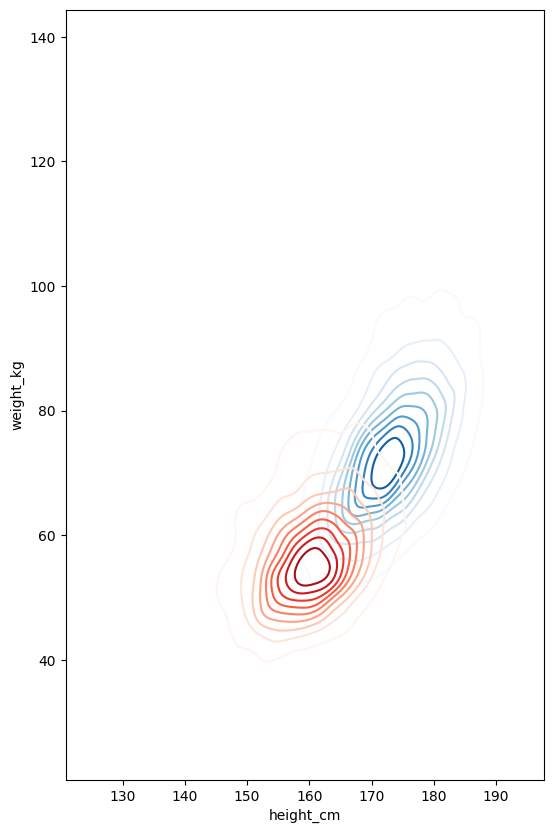

In [4]:
## 성별 분포 시각화(키X몸무게)

## 셩별 구분 데이터
df_man = df.loc[df['gender']=='M',:]
df_woman = df.loc[df['gender']=='F',:]


# 그래프 설정 
f,ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal') # 이거 먼지 검색 ㄱㄱ 

# 가로길이, 세로길이 변수 축 설정
ax = sns.kdeplot(x=df_man.height_cm,y= df_man.weight_kg,cmap = 'Blues',
                 shade = False , shade_lowest = False, cbar= False )
ax = sns.kdeplot(x = df_woman.height_cm,y = df_woman.weight_kg,cmap = 'Reds',shade=False,shade_lowest=False,cbar=False)

> 키랑 몸무게는 성별에 따라 차이가 잘 나타나는 변수들중 하나임, 그래서 시각화 했고, 겹친 부분이 있지만 차이를 확인함.

#### 변수들간 스케일 차이가 나므로 전처리 ㄱㄱ


In [5]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
# 독립변수 정규화

# 독립변수와 종속변수 분리
## 클래스는 먼지 모르겠음 
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

## 데이터 정규화

scaler = MinMaxScaler()

df_minmax = scaler.fit_transform(df_x)

## 데이터프레임으로 ㄱㄱ
df_x = pd.DataFrame(df_minmax,columns=df_x.columns)



In [7]:
df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [8]:
## 학습 데이터와 테스트 셋 데이터 분리
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=132)

print('훈련 데이터 수 :',len(x_train))
print('테스트 데이터 수 :',len(x_test))




훈련 데이터 수 : 9375
테스트 데이터 수 : 4018


In [9]:
## 선형판별분석 모델 적용

## 파라미터 찾아보셈 

LDA_1 = LinearDiscriminantAnalysis(store_covariance=True)

LDA_1.fit(x_train,y_train)
y_train_pred = LDA_1.predict(x_train)
y_test_pred = LDA_1.predict(x_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

## 흠 성별을 분류하는데 필요한 변수들 중 명확해 보이는게 너무 많았음
## 예를들면 키 + 몸무게 + 악력 + 싯업 + 멀리뛰기같은 ... 
## 그리고 연령과 같은 애매한 변수들도 제거 했기떄문에 더 명확했음

0.9805866666666667
0.9766052762568442


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [11]:
df.loc[df['gender']=='M','class'].value_counts()

class
C    2237
D    2204
B    2162
A    1864
Name: count, dtype: int64

In [12]:
df.loc[df['gender']=='F','class'].value_counts()

class
A    1484
B    1185
D    1145
C    1112
Name: count, dtype: int64

> 그리고 먼지는 모르지만 성별에 따라 class의 분포가 확실히 다르다는것을 확인했는데 이거도 넣어서 분석한다면 차이가 더 명확해질거같ㅌ음. 


In [13]:
### 선향 판별분석 모델의 상수와 계숫값 출력
print('Intercept :',LDA_1.intercept_)
print('Coef :',LDA_1.coef_)


Intercept : [-14.13051361]
Coef : [[ -0.99125745  25.8319944  -29.34152223   3.92968591   9.94148263
   19.00544834 -64.19462274  -3.69761181  16.14311258]]


In [19]:
df_lda_component

,lda_component,target
0,1.716354,NaN
1,1.162836,M
2,0.639452,NaN
3,1.179889,M
4,1.495374,M
...,...,...
9370,-2.114191,M
9371,2.573795,M
9372,2.210539,NaN
9373,-2.945046,NaN


In [23]:
y_train

,gender
2153,M
8973,M
11895,M
3003,M
12625,M
...,...
6314,F
1714,M
12369,M
12090,F


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hamin\AppData\Local\Temp\ipykernel_4524\196028730.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender']=='M','height_cm'],
C:\Users\Hamin\AppData\Local\Temp\ipykernel_4524\196028730.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

<Axes: xlabel='lda_component'>

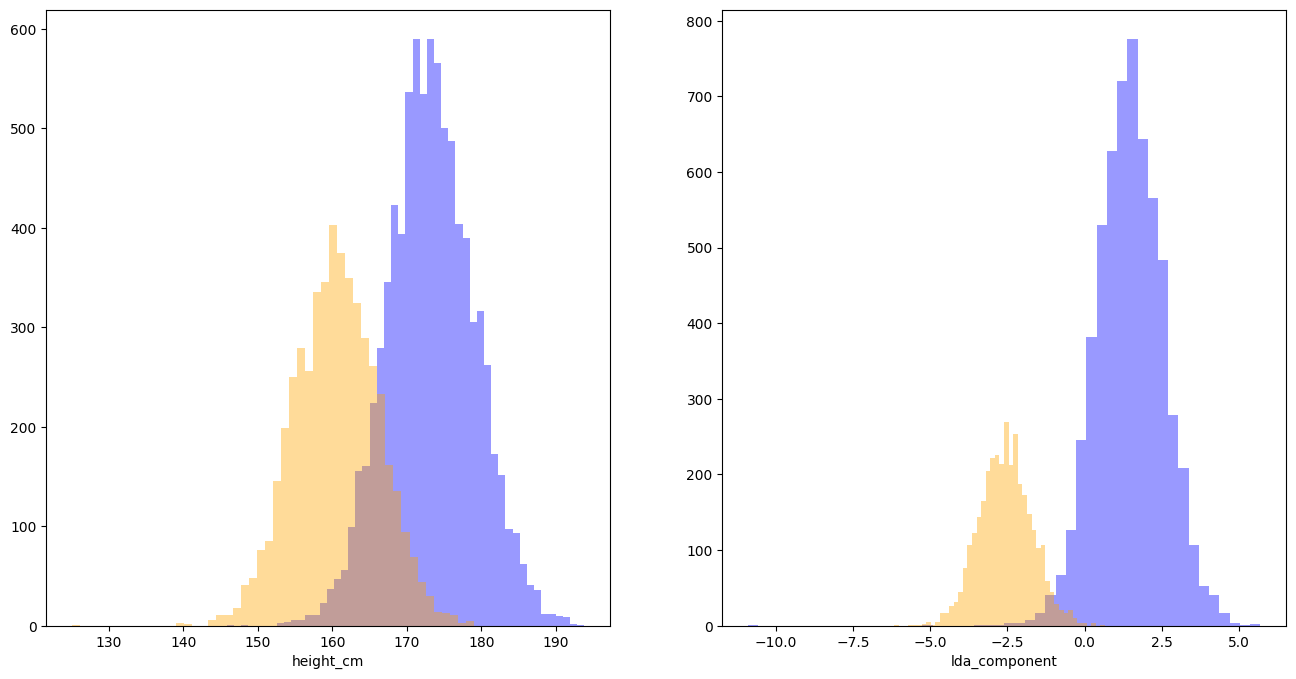

In [21]:
### 선형 판별분석 차원축소 적용

## 주성분이 한개로 설정


lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train,y_train)

df_lda_com = lda_com.transform(x_train)

df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])
# df_lda_component.head()
# 종속변수 데이터 셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원 축소 요소 분별력 비교 시각화 설정

fig,ax = plt.subplots(figsize=(16,8),ncols=2,nrows=1)

# 키 요소의 분별력 
# 키로 남녀구분했을때랑 남녀구분하는 주성분을하나로 설정했을 때 겹치는 부분이 적은 부분이 
# 좀 더 좋은 모델인거같음
sns.distplot(df.loc[df['gender']=='M','height_cm'],
            hist= True, kde=False, color = 'blue',label = 'man',ax=ax[0])
sns.distplot(df.loc[df['gender']=='F','height_cm'],
             hist=True,label='woman',kde=False,color='orange',ax=ax[0])
## 단순히 신장으로 구분했을 때는 겹치는 부분이 좀 있어보임

# 주성분 갯수를 1로 차원 축소 햇을때 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target']=='M','lda_component'],
             hist= True, kde=False, label = 'man',ax= ax[1],color='blue')
sns.distplot(df_lda_component.loc[df_lda_component['target']=='F','lda_component'],
             hist=True,kde=False,color='orange',label='woman',ax=ax[1])

### 주성분을 ㅏ나로 두고 차원을 축소했을때 겹치는 부분이 거의 없음. 분별력이 더 좋음


In [24]:
# 이차 판별분석 모델 적용

qda = QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train,y_train)
qda_train_pred = qda.predict(x_train)
qda_test_pred = qda.predict(x_test)

print(accuracy_score(y_train,qda_train_pred))
print(accuracy_score(y_test,qda_test_pred))


## 선형판별분석이랑 또이또이함


0.9816533333333334
0.9773519163763066


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# 이차 판별분석 모델 성능 리포트
print(classification_report(y_test,qda_test_pred))

              precision    recall  f1-score   support

           F       0.98      0.96      0.97      1504
           M       0.98      0.99      0.98      2514

    accuracy                           0.98      4018
   macro avg       0.98      0.97      0.98      4018
weighted avg       0.98      0.98      0.98      4018

